<a href="https://colab.research.google.com/github/GotAMinor/DS-for-Archi-envirnoment/blob/main/Dimensionality_Reduction_BOTH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!-- JPN -->
# 次元削減

<!-- ENG -->
# Dimensionality Reduction

<!-- JPN -->
※本演習資料の二次配布・再配布はお断り致します。

<!-- ENG -->
※Distribution or redistribution of these exercise materials without the copyright holder's permission is not permitted.

<!-- JPN -->
　例えば、データが $\boldsymbol{x} = \left[x_1, \dots, x_{10000}\right]$ の10,000次元であるとすると、視覚的に各データがどう散らばっているか、あるいはまとまっているかを確認することは当然困難である。このような高次元のデータを低次元（例えば2次元）でなんとか表現しようとする（正確には「射影する」）ことで、**データの可視化**に役立つのが次元削減である。

<!-- ENG -->
　For example, if the data is $\boldsymbol{x} = \left[x_1, \dots, x_{10000}\right]$, which has 10,000 dimensions, it is naturally difficult to visually check how each data item is scattered or grouped. Dimension reduction is a useful way to **visualize data** by trying to somehow represent (or more accurately, "project") such high-dimensional data in a lower dimension (e.g., two dimensions).

<!-- JPN -->
- **1 | 高次元データの目視の難しさ**
- **2 | 主成分分析 (PCA)**
- **3 | 多次元尺度構成法 (multidimensional scaling; MDS)**
- **4 | 正準相関分析 (Canonical Correlation Analysis; CCA)**
- **5 | 次元削減と分類予測手法の組み合わせ** 

<!-- ENG -->
- **1 | Difficulties in visualizing high-dimensional data**
- **2 | Principal component analysis (PCA)**
- **3 | Multidimensional scaling (MDS)**
- **4 | Canonical correlation analysis (CCA)**
- **5 | Combining dimension reduction and classification prediction** 

<!-- JPN -->
第2章から第4章までは手法そのものを利用してデータの可視化に取り組む。それぞれの手法がどのような特徴を持つのか、というところに着目しながら内容を確認してほしい。

　また、第5章では次元削減による**データノイズの低減**という異なる側面を説明する。


<!-- ENG -->
From sections 2 to 4, we will use these methods themselves to visualize the data. I would like you to check the contents of each method, paying attention to the characteristics of each method.

　Section 5 also illustrates a different aspect of **data noise reduction** through dimension reduction.

<!-- JPN -->
## 1 | 高次元データの目視の難しさ

<!-- ENG -->
## 1 | Difficulties in visualizing high-dimensional data

<!-- JPN -->
　手法の説明に入る前に、どのような場合に次元削減が必要になるかを簡単に考えてみよう。ここでは、本演習の第4回でも使用した手書き文字データ（digitsデータ）のうち300件を用いて説明する。


<!-- ENG -->
　Before going into the explanation of the method, let’s briefly consider when dimension reduction is necessary. Here, I will explain the situation by using 300 handwritten character data items (digits data) that we also used in part 4 of this exercise.



In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
num_data = 300
d = datasets.load_digits()
X = d.data[:num_data]
y = d.target[:num_data]

In [26]:
print(X)
print(y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  0. ...  2.  0.  0.]
 [ 0.  0.  7. ...  9.  0.  0.]
 [ 0.  0.  6. ...  0.  0.  0.]]
[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0
 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9
 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4
 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7
 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2
 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 7 3 1 3 9 1
 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 5 4 8 8 4 9 0 8 9 8 0 1 2
 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9
 8 4 1 7]


<!-- JPN -->
　digitsデータは64次元の数値から構成されているが、人間は当然4次元以上のデータの散らばり/まとまり を直感的に理解するのは困難である。そのため、通常は**データを何らかの形で2次元の値に変換して表示したい**と思うわけである。

　例えば以下の場合では、64次元のうち、10次元目と11次元目の2軸を使ってデータの散らばりを見てみる。なお、この10, 11次元目とは、以下の図に示した画素の色を指している。


<!-- ENG -->
　The digits data consists of 64-dimensional numerical values, and it is naturally difficult for humans to intuitively understand the distribution and cohesion of data with more than 4 dimensions. Therefore, we usually want to **convert the data into two-dimensional values in some way and display them**.



　For example, in the following case, let's look at the data distribution using the two axes of the 10th and 11th dimensions of the 64 dimensions. Note that the 10th and 11th dimensions refer to the colors of the pixels shown in the following figure.



<img src="https://i.imgur.com/DNoTMPI.png" alt="Figure x" width="50%">

In [3]:
## Function for 2D visualization of handwritten character data
def plot_digits(X, y, n_labels=10, title=None):
  # plot X/y in 2-dimensions
  plt.figure(figsize=(5,5))

  # set color palette for plot
  color = [plt.cm.nipy_spectral(i/n_labels, 1) for i in range(n_labels)] 

  # plot by each label
  for i in range(n_labels):
    plt.scatter(X[y==i, 0], X[y==i, 1],
                color=color[i], marker=f"${i}$")
  plt.xlabel("1st axis")
  plt.ylabel("2nd axis")
  plt.title(title)
  plt.show()

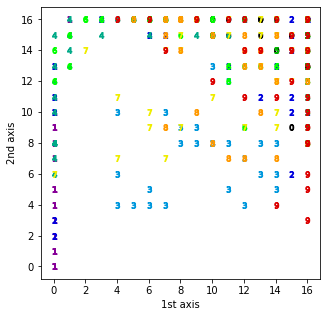

In [4]:
# Draw using the 10th and 11th dimensions of all data (300 items)
plot_digits(X[:, [10,11]], y, n_labels=10)

<!-- JPN -->
　値が整数値しかとらないこともあり碁盤の目のように整列しているのは良いが、残念ながら各文字がキレイに分離されているとは言い難い状態であることがわかる。
　

<!-- ENG -->
　It is a good thing that the values are aligned like a grid because they only take integer values. However, unfortunately, you can see it is difficult to say that each character is neatly separated.

　

<!-- JPN -->
## 2 | 主成分分析 (principal component analysis; PCA)

<!-- ENG -->
## 2 | Principal component analysis (PCA)

<!-- JPN -->
　まず、次元削減方法の1つとして、主成分分析 (PCA) に触れる。長さ $K$ のベクトルであるようなデータ $\boldsymbol{x}_n$ を、より低次元である $r$ 次元のベクトルに線形変換するものである。

　では、実際にPCAを行い、結果を可視化してみよう。 今回は2次元に可視化するため、`n_components=2`を指定する。


<!-- ENG -->
Principal component analysis (PCA) is one of dimensionality reduction methods, and is a linear transformation of data $\boldsymbol{x}_n$, such as a vector of length $K$, into a lower dimensional vector of dimension $r$.

Now, let's actually do PCA and visualize the results. This time, we will specify `n_components=2` to visualize it in two dimensions.


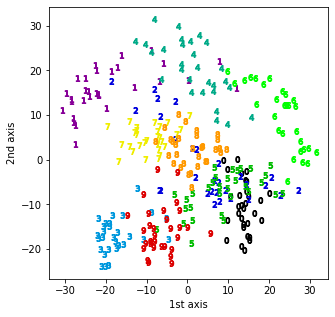

In [27]:
# prepare PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # 2 components will be used
pca.fit(X) # obtain principal component
images_map = pca.transform(X) # transform input data using PCA

plot_digits(images_map, y, n_labels=10)

<!-- JPN -->
　1 で試した結果に比べて、数字ごとの塊が構成できていることがわかる。

<!-- ENG -->
　Compared to the results we tried in 1, we can see that we are able to compose chunks of each number.

<!-- JPN -->
　PCAでは、各主成分（固有ベクトル）の値を見ることで、どの説明変数が主要な寄与をしているか、また各主成分の固有値がデータの分散のどれだけの割合を表しているか確認することができる。実際に各成分の寄与を見てみよう。

<!-- ENG -->
　With PCA, by looking at the value of each principal component (eigenvector), we can check which explanatory variables are the main contributors and how much of the variance in the data is represented by the eigenvalues of each principal component. Let's take a look at the actual contribution of each component.

In [7]:
import pandas as pd
pca = PCA(n_components=3).fit(X) # PCA, use 3 components

columns = range(64)
indexes = ["PC1", "PC2", "PC3"]
components = pca.components_ # get components from PCA result

print(pd.DataFrame(components, index=indexes, columns=columns))

               0         1         2         3         4         5         6   \
PC1  2.913330e-18  0.000984  0.008866  0.118866 -0.056783 -0.171844 -0.044215   
PC2 -6.354556e-18 -0.023672 -0.255373 -0.246952  0.055550  0.019737  0.002306   
PC3 -4.294286e-18  0.038710  0.215437  0.123799  0.091058  0.153439  0.056270   

           7             8         9   ...        54        55   56        57  \
PC1 -0.004093  6.938894e-18  0.035431  ...  0.114250  0.002496  0.0  0.001445   
PC2  0.000985 -8.326673e-17 -0.077375  ... -0.060070  0.000430  0.0 -0.021826   
PC3  0.007944 -1.110223e-16  0.079130  ... -0.161661 -0.003160 -0.0  0.040464   

           58        59        60        61        62        63  
PC1  0.001661  0.113164  0.074104  0.013298  0.049194  0.000278  
PC2 -0.264832 -0.259050  0.005141  0.026306  0.006144 -0.001254  
PC3  0.235633  0.122043 -0.240898 -0.234537 -0.034888 -0.000164  

[3 rows x 64 columns]


--------

<!-- JPN -->
## 3 | 多次元尺度構成法 (multidimensional scaling; MDS)

<!-- ENG -->
## 3 | Multidimensional scaling (MDS)

<!-- JPN -->
　PCA以外の次元削減手法として「**多次元尺度構成法 (MDS)**」というものが存在する。

　PCAはデータ全体の広がりを保つように低次元化する手法であったが、MDSは**データの組の距離関係をできるだけ再現するように低次元化する手法**である。MDSには計量的 (Metric) MDSと非計量的 (Nonmetric) MDSがあり、いずれも**各データ点間の非類似度（dissimilarity, 距離等）さえ与えられていればよい**。

　ここでは、Metric MDSに絞って実行してみよう。Metric MDSではデータ点間の非類似度が変換前後で一致するような低次元化を行う。数学的に表現すると、射影前の空間での非類似度$d_{ij}$と射影後の非類似度$\|z_i - z_j\|$の差を最小化する、つまり以下の最適化を行う。


<!-- ENG -->
　**Multidimensional Scaling (MDS)** is another dimension reduction method other than PCA.

　PCA is a method of reducing the dimensionality of the data so as to preserve the spread of the entire data, while MDS is **a method of reducing the dimensionality of the data so as to reproduce the distance relationship between pairs of data as much as possible**. There are two types of MDS: Metric MDS and Nonmetric MDS, both of which **require only the dissimilarity, such as distance, of each data point**.

　Here, let's focus on Metric MDS. Metric MDS reduces the dimensionality so that the dissimilarity between data points is consistent before and after the transformation. To Express mathematically, it minimizes the difference between the dissimilarity $d_{ij}$ in the space before the projection and the dissimilarity $\|z_i - z_j\|$ after the projection. In other words, it is the same as optimization in the following formula.


<!-- BOTH -->
$$
\min_{z_1, \ldots, z_n \in \mathbb{R}^r} \sum_{i, j}\left(d_{ij} - \|z_i - z_j\|\right)^2
$$


<!-- JPN -->
　ここまで手書き文字のデータを使って説明をしてきたが、「画像の非類似度」とはどのように定義すればよいだろうか。ここでは、また画像を数値列として考えて、2つの数値列間のユークリッド距離を考えることにする。

<!-- ENG -->
　We have used handwritten text data to explain this, but how can we define "image dissimilarity"? Here, we will again consider the image as a vector of numbers, and consider the Euclidean distance between two vectors of numbers.

<!-- BOTH -->
<img src=https://i.imgur.com/d11zzpY.png width=500>

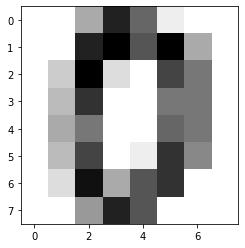

The figure is treated as a vector x =  [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [8]:
image = d.images[0]
x = X[0]
plt.imshow(image, cmap=plt.cm.gray_r)
plt.show()
print("The figure is treated as a vector x = ", x)

In [9]:
import numpy as np

x1 = X[0]
x2 = X[1]

print("figure 1 =", x1)
print("figure 2 =", x2)

#Considering a sequence of numbers as a vector, the Euclidean distance can be calculated by np.linalg.norm(x1-x2)
print("The Euclidean distance of them :", np.linalg.norm(x1-x2))

figure 1 = [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
figure 2 = [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
The Euclidean distance of them : 59.55669567731239


<!-- JPN -->
　それでは、実際にscikit-learnのMetric MDSを実行してみる。なお、scikit-learnのMetric MDSは、データを入力するとデフォルトでユークリッド距離を非類似度として用いて計算を行ってくれる。


<!-- ENG -->
　Now, let's actually run Metric MDS in scikit-learn. Note that Metric MDS in scikit-learn uses the Euclidean distance as the dissimilarity by default when you input data.



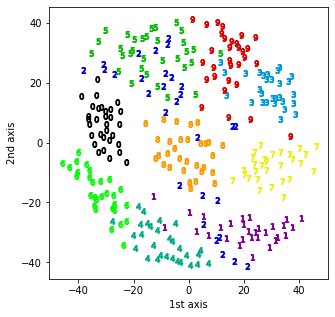

In [10]:
from sklearn.manifold import MDS
mds = MDS(n_components=2, metric=True, random_state=2022) # metric MDS
X_low = mds.fit_transform(X)

plot_digits(X_low, y, n_labels=10)

<!-- JPN -->
　MDSは内部にランダムな要素を含むアルゴリズムであり、乱数のシード `random_state` によって結果が変化する。乱数のシードを変更し、結果が変わることを確かめてほしい。

<!-- ENG -->
　MDS is an algorithm that contains random elements inside, and the result changes depending on the random number seed, `random_state`. Change the seed of the random number and see if the result changes.

<!-- JPN -->
　今回はPCAと結果を比較するためにベクトルで表現できるものを対象としたが、**MDSは非類似度さえ定義できれば適用可能**である。このため、ベクトル表現できないもの、例えば文字列に対して、編集距離などの非類似度を定義することでMDSを適用することが可能になる。

<!-- ENG -->
　In this study, we focused on those that can be expressed as vectors in order to compare the results with PCA, but **MDS can be applied as long as the dissimilarity can be defined**. Therefore, it is possible to apply MDS by defining the dissimilarity such as an edit distance for a character string that cannot be represented by a vector.

<!-- BOTH -->
----

<!-- JPN -->
##### 課題 1

以下に swiss-roll データセットを生成し、3次元空間に描画するコードを示す。swiss-roll データセットでは、データがうずまき状に並んでいる。

今日これまで学んできた PCA および ユークリッド距離に基づくMDS の2つの手法について、このswiss-roleデータセットに適用し、うずまきを展開するようには **機能しない** ことを確認せよ。また、なぜそのようになるかを考察せよ。

<!-- ENG -->
##### Exercise 1

The following code generates a swiss-role dataset and draws it in 3D space.

Apply the PCA and MDS methods we have studied above to the swiss-role dataset and confirm that it **does not work** to unroll the swirl. Also, discuss why this is the case.

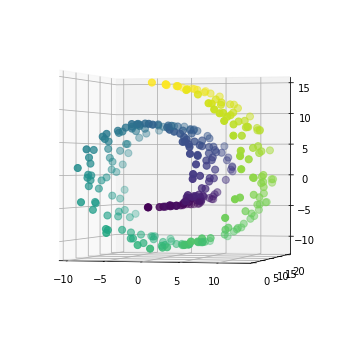

In [23]:
X_sr, t_sr = datasets.make_swiss_roll(n_samples=300, random_state=2022)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.view_init(0, -75)
ax.scatter(X_sr.T[0], X_sr.T[1], X_sr.T[2], c=t_sr, s=50)
plt.show()

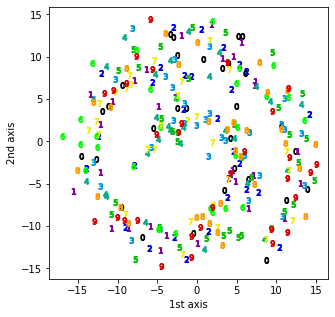

In [28]:
mds = MDS(n_components=2, metric=True, random_state=2022) # metric MDS
X_low = mds.fit_transform(X_sr)

plot_digits(X_low, y, n_labels=10)

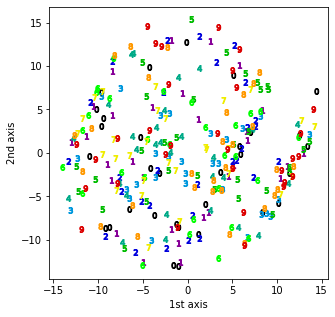

In [31]:

pca = PCA(n_components=2) # 2 components will be used
pca.fit(X_sr) # obtain principal component
images_map = pca.transform(X_sr)

plot_digits(images_map, y, n_labels=10)

<!-- BOTH -->
----

<!-- JPN -->
##### 課題 2
　課題 1で示したような swiss-roll データセットについて、うずまきの内側とうずまきの外側を分離することのできる次元削減手法を調べて答えよ。



<!-- ENG -->
##### Exercise 2
　For the swiss-roll data set such as the one shown in Exercise 1, search and answer the dimensionality reduction methods that can separate the inside of the spiral from the outside of the spiral.


In [36]:
from sklearn import manifold

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


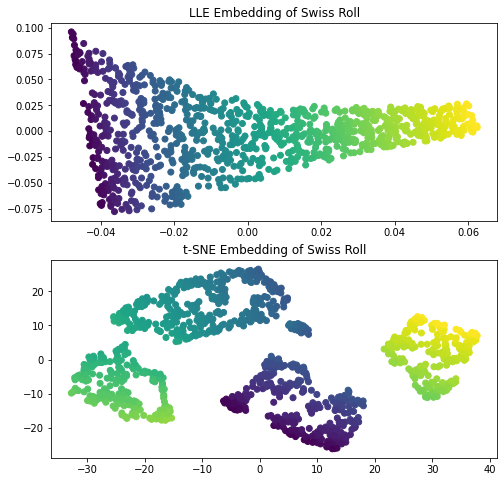

In [41]:
sr_points, sr_color = datasets.make_swiss_roll(n_samples=1000, random_state=2022)
sr_lle, sr_err = manifold.locally_linear_embedding(
    sr_points, n_neighbors=12, n_components=2
)
sr_tsne = manifold.TSNE(
    n_components=2, learning_rate="auto", perplexity=40, init="pca", random_state=0
).fit_transform(sr_points)


fig, axs = plt.subplots(figsize=(8, 8), nrows=2)
axs[0].scatter(sr_lle[:, 0], sr_lle[:, 1], c=sr_color)
axs[0].set_title("LLE Embedding of Swiss Roll")
axs[1].scatter(sr_tsne[:, 0], sr_tsne[:, 1], c=sr_color)
_ = axs[1].set_title("t-SNE Embedding of Swiss Roll")

<!-- BOTH -->
-----

<!-- JPN -->
## 4 | 正準相関分析 (Canonical Correlation Analysis; CCA)

<!-- ENG -->
## 4 | Canonical correlation analysis (CCA)

<!-- JPN -->
　PCA, MDSは**1種類のデータが多数存在**する場合に、データを表すベクトルや、データ間の非類似度を元に低次元空間で表現しようとするものであった。

　正準相関分析 (CCA) は**組になっている**2種類のデータが多数存在する場合に、それらのデータを**同じ低次元空間で表現**しようとするものである。

　2種類のデータの列 $(\boldsymbol{x}_1, \boldsymbol{z}_1), \ldots, (\boldsymbol{x}_n, \boldsymbol{z}_n)$ に対して、**$\boldsymbol{x}$ と $\boldsymbol{z}$ に共通した**低次元表現を求めるために、CCAでは以下の最適化問題を解いて行列 $A$, $B$ を求める。（なお、後述の例で取り扱うように、CCAでは2種類のデータ $\boldsymbol{x}$ と $\boldsymbol{z}$ の次元数は等しくなくてもよい。）

<!-- ENG -->
　PCA and MDS are intended to represent **a large number of data of one type** in a low-dimensional space based on vectors representing the data and dissimilarities between the data.

　Canonical correlation analysis (CCA) is intended to represent a large number of **paired** data **in the same low-dimensional space**.

　In order to find a low-dimensional representation **common to $\boldsymbol{x}$ and $\boldsymbol{z}$** for two columns of data $(\boldsymbol{x}_1, \boldsymbol{z}_1), \ldots, (\boldsymbol{x}_n, \boldsymbol{z}_n)$, CCA solves the following optimization problem to obtain matrices $A$, $B$. (As handled in the following example, with CCA, the number of dimensions of the two types of data $\boldsymbol{x}$ and $\boldsymbol{z}$ do not have to be equal.)

<!-- BOTH -->
$$
\min_{A,B}\frac{1}{n} \sum_{i=1}^{n}\|A^T x_i - B^T z_i \|^2 \ \ \ \
{\rm s.t. }\ \ 
\mathbb{V}[A^T x_i]=\mathbb{V}[B^T z_i] = I_r
$$

<!-- JPN -->
　例えば、$x$, $z$がそれぞれ1次元のデータで、$x$ と $z$ に共通するシグナル $c_i$ と、$x$ と $z$ で相互の関係が無く発生するノイズ $n_i, n'_i$ から構成されるとしよう。ただし、ノイズはシグナルに比べると幾分強く、簡単にはシグナルを発見できない状態を考える。


<!-- ENG -->
　For example, suppose that $x$ and $z$ are one-dimensional data, each consisting of a signal $c_i$ common to $x$ and $z$ and noise $n_i, n'_i$ occurring in $x$ and $z$ with no mutual relationship. However, consider a situation where the noise is somewhat stronger than the signal and the signal cannot be easily detected.



<!-- BOTH -->
$$ 
\left\{
\begin{array}{l} 
  x_i= \varepsilon c_i+n_i \\
  z_i= \varepsilon c_i+n'_i \\
\end{array}
\right.
$$

<!-- JPN -->
$\varepsilon$ は小さい定数であり、シグナルに比べてノイズが強いことを意味している。

　このようなとき、**PCAではノイズ $n_i, n_i'$ を強く検出してしまうが、CCAは $c_i$ を検出することが可能である**（実際に疑似データを使って実験してみると良い）。



<!-- ENG -->
$\varepsilon$ is a small constant, meaning that the noise is strong compared to the signal.



　In such cases, **PCA strongly detects the noise $n_i, n_i'$, while CCA can detect $c_i$** (you can actually experiment with pseudo data).


<!-- JPN -->
### 4.1 | CCAの実行

　今回は、講義で行ったものと同様に、手書き文字画像を上下に分割し、この分割されたデータ対に対してCCAを適用、それらが関連付けられるかどうかを確認する。ここでは画像の上部48次元を $\boldsymbol{x}$、下部16次元を $\boldsymbol{z}$ とする。

<!-- ENG -->
### 4.1 | Executing CCA

　This time, we will split the handwritten text image into upper and lower parts, as we did in the lecture, and apply CCA to the split data pairs to see if they can be associated. Here, the upper 48 dimensions of the image are $\boldsymbol{x}$ and the lower 16 dimensions are $\boldsymbol{z}$.

<img src="https://i.imgur.com/xP3OAuI.png" alt="digits split" width="70%"></img>

<!-- JPN -->
**digitsデータの分割** 前述したように、CCAでは $\boldsymbol{x}$ と $\boldsymbol{z}$ の次元数は等しくなくてもよい。


<!-- ENG -->
**Splitting the digits data** As mentioned above, the number of dimensions of $\boldsymbol{x}$ and $\boldsymbol{z}$ do not have to be equal in CCA.



In [42]:
num_data = 300
d = datasets.load_digits()
D = d.data[:num_data]
y = d.target[:num_data]

X = D[:, :48] # 0...47
Z = D[:, 48:] # 48...63

<!-- JPN -->
続いて、`X`, `Z` を画像ではなく「数値の羅列」として考えて正準相関分析を実行する。

<!-- ENG -->
Next, CCA is performed by considering `X` and `Z` as a "sequence of numbers" rather than images.

In [43]:
# Think of it as a series of numbers, not images.
print("X[0] =", X[0])
print("Z[0] =", Z[0])

X[0] = [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.]
Z[0] = [ 0.  2. 14.  5. 10. 12.  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [44]:
# Perform CCA based on X and Z, and optimize matrices A and B
from sklearn.cross_decomposition import CCA
cca = CCA(n_components=2, scale=True)
cca.fit(X, Z)

CCA()

<!-- JPN -->
これで、CCAの行列 $A$, $B$ の最適化が行われた。教師なし学習を行った際のデータを入力してみよう。



<!-- ENG -->
Now the matrices $A$ and $B$ of the CCA have been optimized. Let's input the data from the unsupervised learning.


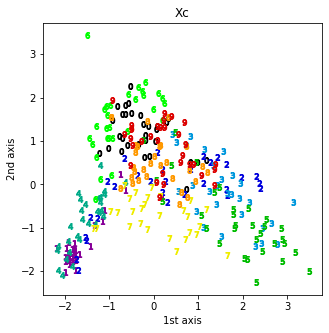

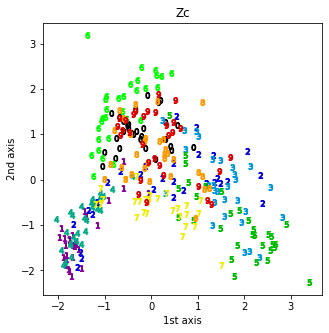

In [45]:
Xc, Zc = cca.transform(X, Z)
plot_digits(Xc, y, title="Xc")
plot_digits(Zc, y, title="Zc")

<!-- JPN -->
　実行結果から、$X$と$Z$が同一の特徴空間に射影されており、対応関係にある $\boldsymbol{x}_i$ と $\boldsymbol{z}_i$ が特徴空間内で近接し、また同じ数字は同じような位置に射影されている。この結果から、CCAによって画像の上部分と下部分が関連付けられた低次元表現が得られたことがわかる。

<!-- ENG -->
　From the execution results, we can see that $X$ and $Z$ are projected into the same feature space, the corresponding $\boldsymbol{x}_i$ and $\boldsymbol{z}_i$ are close to each other</font>, and the same numbers are projected into similar locations. This result shows that CCA has produced a low-dimensional representation of the image with the upper and lower parts associated with it.

<!-- JPN -->
　なお、発展的な例として、 [正準相関分析を用いた図書推薦](https://qiita.com/yanagi3150/items/7c84f7d9200e57436879) の記事を作成しているので、さらにCCAの理解を深めたい場合にはこちらも参照してほしい。

<!-- ENG -->
　Additionally, we created a post in Qiita (in Japanese), titled ["Book Recommendations on CCA"](https://qiita.com/yanagi3150/items/7c84f7d9200e57436879) . So refer to this post if you want to deepen your understanding of CCA.

---

<!-- JPN -->
##### 課題 3
以下のデータに対して第1主成分のみを取得するCCAを実施し、$X$ と $Z$ に共通する真のシグナル $\boldsymbol{c} = 4\sin(\boldsymbol{t})$ と、$X$ をCCAによって変換した $\hat{\boldsymbol{c}}_X$ の比較を行え。比較の指標として、$\boldsymbol{c}$ と $\hat{\boldsymbol{c}}_X$ を **それぞれ独立に標準化した上で** RMSE値を算出、小数点以下第3位まで示せ。

<!-- ENG -->
##### Exercise 3
Perform CCA and obtain only the first principal components for the following data and then compare the true signal $\boldsymbol{c} = 4\sin(\boldsymbol{t})$ common to $X$ and $Z$ with $\hat{\boldsymbol{c}}_X$, transformed by CCA for $X$. Calculate the RMSE of $\boldsymbol{c}$ and $\hat{\boldsymbol{c}}_X$ after **independently standardizing them**, and answer it to three decimal places.

<!-- BOTH -->
$$ \begin{aligned}
\boldsymbol{t} & = [0,0.01, ... 1.99]   \\
\boldsymbol{c} & = 4\sin(\boldsymbol{t}) \\
\\
X & = 
\left[
\begin{array}{l} 
  \boldsymbol{c}       + \delta \\
  \exp(\boldsymbol{t}) + \delta \\
\end{array}
\right] \\
Z & = 
\left[
\begin{array}{l} 
  \boldsymbol{c}            + \delta \\
  \boldsymbol{c} + \cos(2\boldsymbol{t}) + \delta \\
\end{array}
\right]
\end{aligned}$$


In [46]:
def gen_data():
  np.random.seed(2022)
  points = 200

  c = np.sin(np.arange(0,2, 2/points))*4

  X = np.vstack([
    c                                + np.random.random(points),
    np.exp(np.arange(0,2, 2/points)) + np.random.random(points)
  ]).T

  Z = np.vstack([
    c                                      + np.random.random(points),
    c + np.cos(np.arange(0,2*2, 2*2/points))*4 + np.random.random(points)
  ]).T


  return c, X, Z

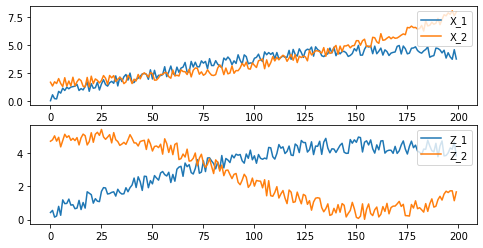

In [47]:
signal, X, Z = gen_data()

fig = plt.figure(figsize=(8,4))
ax_x = fig.add_subplot(211)
ax_z = fig.add_subplot(212)

for i in range(X.shape[1]):
  ax_x.plot(X[:,i], label=f'X_{i+1}')
ax_x.legend(loc='upper right')

for i in range(Z.shape[1]):
  ax_z.plot(Z[:,i], label=f'Z_{i+1}')
ax_z.legend(loc='upper right')

plt.show()

In [55]:
cca = CCA(n_components=1, scale=True)
cca.fit(X, Z)
Xc, Zc = cca.transform(X, Z)

In [87]:
from sklearn.preprocessing import StandardScaler
scaler_a = StandardScaler()
Xc_scale = scaler_a.fit(Xc)
Xc_new = Xc_scale.transform(Xc)
signal_r = signal.reshape(200,1)
scaler_b = StandardScaler()
signal_scale = scaler_b.fit(signal_r).transform(signal_r)

In [90]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(Xc_new,signal_scale))

0.2444080909349892

In [88]:
print(np.sqrt(((Xc_new - signal_r)**2).mean()))
print(np.sqrt(((Zc - signal)**2).mean()))

2.845368853887392
3.3613541111249035


---

<!-- JPN -->
### 4.2 | CCAによる画像の復元（発展）

  主成分分析 (PCA) および正準相関分析 (CCA) はいずれも線形変換を行うものであるため、線形変換を表す行列の逆行列との行列積をとることで、画像を復元することが可能である。
  ここでは、CCAを用いて低次元化した画像を復元してみよう。


<!-- ENG -->
### 4.2 | Image recovery using CCA (Advanced)

Both of principal component analysis (PCA) and canonical correlation analysis (CCA) reduce dimensions with linear transformation. Thus, we can reconstruct an image by multiplying inverse matrix. Let’s try to recover an image that has been reduced the dimensionality by using CCA.


In [ ]:
# prepare dataset
num_data = 300
d = datasets.load_digits()
D = d.data[:num_data]
y = d.target[:num_data]

X = D[:, :48] # 0...47  feature
Z = D[:, 48:] # 48...63 feature

# prepare one test image
image_index = 0
X_test = D[image_index, :48].reshape(1, -1)
Z_test = D[image_index, 48:].reshape(1, -1)


In [ ]:
# projection and inverse-projection by CCA
from sklearn.cross_decomposition import CCA
cca = CCA(n_components=16, scale=True)
cca.fit(X, Z)
Xc, Zc = cca.transform(X, Z)

X_test_map, Z_test_map = cca.transform(X_test, Z_test)
X_recovered_from_X = cca.inverse_transform(X_test_map)
X_recovered_from_Z = cca.inverse_transform(Z_test_map)

In [ ]:
# plot 3 images
X_test_image = X_test.reshape(6, 8)
X_recovered_from_X_image = X_recovered_from_X.reshape(6, 8)
X_recovered_from_Z_image = X_recovered_from_Z.reshape(6, 8)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(X_test_image)
plt.title("Unprocessed image (upper part)")

plt.subplot(1, 3, 2)
plt.imshow(X_recovered_from_X_image)
plt.title("recovered_from_X")

plt.subplot(1, 3, 3)
plt.imshow(X_recovered_from_Z_image)
plt.title("recovered_from_Z")

plt.show()

<!-- JPN -->
上の3セルを実行すると三つの画像が出てくる。

左から、それぞれ元の画像の上側、上側を変換・逆変換して上側を復元したもの、下側を変換・逆変換して上側を復元したものである。

`image_index`や`n_components`を変更していくつかの例を試してみよう。
CCAによって画像の上側と下側を関連付けることにより、画像の下側から上側をある程度の精度で復元することが可能になった。


<!-- ENG -->
If you run the three cells above, you will get three images.

From left to right, the upper side of the original image, the upper side which is recovered by transforming and inverse transforming the upper side, and the upper side which is recovered by transforming and inverse transforming the lower side, respectively.

Let's try a few examples by changing `image_index` and `n_components`.
By associating the upper and lower sides of the image using CCA, it is now possible to recover the upper side from the lower side of the image with some accuracy.


<!-- BOTH -->
<img src=https://i.imgur.com/a2mY8UK.png width=500px>

<!-- JPN -->
## 5 | 次元削減と分類予測手法の組み合わせ

　次元削減の利用法の一つとして、高次元のデータを一旦次元削減し、それから別の機械学習手法を適用するというものがある。次元削減手法により、データをうまく表現する特徴量を抽出し、小さなデータセットでも汎化性能の高いモデルを作成するのである。

　ここでは、digitsデータセットのうち**300件のみを訓練データ**として、PCAを用いて低次元化を行って学習した場合に、予測精度がどのように変化するか確認する。



<!-- ENG -->
## 5 | Combining dimension reduction and classification prediction

　One way to use dimension reduction is to reduce the dimensionality of high-dimensional data first and then apply another machine learning method. The dimension reduction extracts the features that represent the data well and creates a model that has high generalization performance even for small data sets.

　Here, we will confirm how the prediction accuracy changes when **only 300 of the digits data sets are used as training data** and training is performed by lowering the dimensions using PCA.

In [63]:
from sklearn import datasets
d = datasets.load_digits()
X = d.data
y = d.target

In [64]:
from sklearn.model_selection import train_test_split

# Unlike the last time, use train_test_split() to split the data
# If an integer value is given to the argument train_size instead of a real number,
# only that number of data will be used as training data, and the rest will be used as test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=300, random_state=2022) 

print(X_train, y_train)

[[ 0.  1. 10. ... 14.  3.  0.]
 [ 0.  1.  9. ...  8.  0.  0.]
 [ 0.  0.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  7. ...  0.  0.  0.]
 [ 0.  0.  0. ...  2.  0.  0.]
 [ 0.  1. 13. ...  0.  0.  0.]] [9 9 1 2 9 6 3 4 4 2 0 0 7 8 5 4 5 8 6 9 9 2 5 8 3 2 3 3 3 3 5 1 1 0 0 5 9
 9 6 6 8 6 2 5 2 1 7 2 6 5 8 5 7 4 7 0 5 0 2 8 7 3 9 3 9 6 1 5 9 8 9 0 3 4
 9 7 3 3 2 8 1 2 8 9 1 3 7 8 3 7 7 4 3 3 2 4 3 8 0 0 8 8 9 8 1 2 0 8 2 6 5
 0 8 7 7 9 1 7 6 2 0 7 5 9 8 2 6 9 8 1 3 8 5 0 0 6 0 4 9 5 0 3 5 6 1 9 8 8
 8 0 7 7 8 1 5 3 2 2 8 7 7 4 1 9 3 4 7 7 4 6 6 0 8 2 7 7 9 8 5 6 2 3 4 8 7
 9 8 8 5 7 3 9 2 4 1 8 5 7 3 4 3 3 5 9 2 3 7 4 5 9 3 4 3 8 8 8 1 3 6 0 9 3
 2 2 8 6 7 8 6 5 2 5 8 5 5 9 9 2 6 7 9 5 1 7 8 6 0 1 2 3 1 6 9 1 1 3 2 7 2
 8 7 4 0 6 0 0 0 1 2 8 4 6 3 2 6 1 5 4 0 2 0 9 1 7 8 7 1 5 5 5 4 4 8 5 7 5
 7 7 4 5]


<!-- JPN -->
　それでは、まず `X_train` だけを使ってPCAの構築を行う。その後の機械学習のためのPCAの場合には、 `n_components` の値は可視化に比べると大き目の値に設定することが多い。

<!-- ENG -->
　Let's start by building the PCA using only `X_train`. In the case of using PCA for subsequent machine learning, the value of `n_components` is often set to a larger value than for visualization.

In [65]:
from sklearn.decomposition import PCA


pca = PCA(n_components=10)
pca.fit(X_train) 

PCA(n_components=10)

<!-- JPN -->
　続いて、 `X_train`、`X_test` それぞれをPCAで次元削減する。

<!-- ENG -->
　Then, `X_train` and `X_test` are dimensionally reduced using PCA.

In [66]:
new_X_train = pca.transform(X_train)
new_X_test  = pca.transform(X_test)

<!-- JPN -->
　ここまでくれば、後は通常の機械学習と同様である。ここでは深さなどを特に制限しない決定木を用いることにしてみよう。

<!-- ENG -->
　Once you get to this point, the rest is just like normal machine learning. Let's use a decision tree with no restrictions especially on depth, etc.

In [67]:
from sklearn.tree import DecisionTreeClassifier

# training
dt = DecisionTreeClassifier(random_state=2022)
dt.fit(new_X_train, y_train)

# prediction 
y_pred = dt.predict(new_X_test)

# evaluation
accuracy = (y_pred == y_test).mean()
print(accuracy)

0.7742150968603875


<!-- JPN -->
　なお、この PCA -> 決定木 という流れも、基盤AI演習で学んだ `make_pipeline()` を使うことができる。同一の正解率が得られることを確認せよ。

<!-- ENG -->
　This PCA -> decision tree flow can also be done using `make_pipeline()`, which we learned in the Exercises in Fundamentals of Artificial Intelligence. Make sure that you get the same accuracy.

In [68]:
from sklearn.pipeline import make_pipeline

# training
pca_dt = make_pipeline(
  PCA(n_components=10), 
  DecisionTreeClassifier(random_state=2022)
)

pca_dt.fit(X_train, y_train)

# prediction 
y_pred = pca_dt.predict(X_test)

# evaluation
accuracy = (y_pred == y_test).mean()
print(accuracy)

0.7742150968603875


<!-- JPN -->
　最後に、次元削減を行わなかった場合のテストデータの正解率と比較してみよう。

<!-- ENG -->
　Lastly, let's compare the accuracy to the test data when no dimension reduction is applied.

In [69]:
# training
dt = DecisionTreeClassifier(random_state=2022)
dt.fit(X_train, y_train)

# prediction
y_pred = dt.predict(X_test)

# evaluation
accuracy = (y_pred == y_test).mean()
print(accuracy)

0.7194388777555111


<!-- JPN -->
　わずかではあるが、次元削減によってテストデータに対する正解率が向上したことが確認できた。

<!-- ENG -->
　Although only slightly, it was confirmed that the dimension reduction improved the accuracy for the test data.

---

<!-- JPN -->
##### 課題 4
　`n_components` の数を1から10まで変動させ、次元削減を行わなかった場合に比べてテストデータの予測精度が向上する `n_components` を列挙せよ（決定木には上記のコードと同様に `random_state=2022` を指定すること）。


<!-- ENG -->
##### Exercise 4
　Vary the number of `n_components` from 1 to 10, and list the `n_components` that improve the prediction accuracy of the test data compared to the case without dimension reduction (specify `random_state=2022` in the decision tree as in the code above).


0.800935203740815


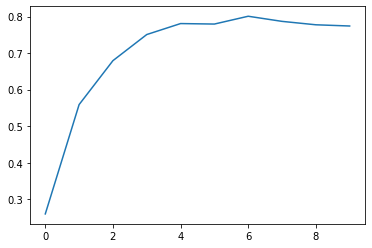

In [81]:
accuracy = []
for n in range(1,11,1):
  pca = PCA(n_components=n)
  pca.fit(X_train) 
  new_X_train = pca.transform(X_train)
  new_X_test  = pca.transform(X_test)
  dt = DecisionTreeClassifier(random_state=2022)
  dt.fit(new_X_train, y_train)

  # prediction 
  y_pred = dt.predict(new_X_test)

  # evaluation
  accuracy.append((y_pred == y_test).mean())
print(np.max(accuracy))
plt.plot(accuracy)


In [80]:

dt = DecisionTreeClassifier(random_state=2022)
dt.fit(X_train, y_train)

# prediction 
y_pred = dt.predict(X_test)

# evaluation
accuracy = (y_pred == y_test).mean()

print(accuracy)

0.7194388777555111


---

<!-- JPN -->
##### 課題 5
　課題 4の結果について、なぜこのような結果になったと考えられるか、「PCAの累積寄与率」「過学習」「バイアスとバリアンス」「モデルの複雑さ」などの単語を適宜利用して考察せよ。必要に応じて、決定木の深さを制限するなどして追加の実験を行っても良い。

<!-- ENG -->
##### Exercise 5
　Regarding the results of Exercise 4, discuss and explain why you think it happened using wording such as "cumulative explained variance ratio of PCA," "overfitting," "bias and variance," and "model complexity" as appropriate. If necessary, additional experiments can be conducted by limiting the depth of the decision tree.

---

<!-- JPN -->
## レポートフォーマット

提出を行う際には以下のフォーマットを利用せよ。

<!-- ENG -->
## Report format

Use a format shown below when you submit your report.

https://docs.google.com/document/d/1ix-WYqcawV5dIaHKGJOdF9unopncByPWbUB3sNVYYnc/edit?usp=sharing